- 평가시 문제가 있을 때? 성능지표가 원하는대로 나오지 않았을 때 가장 많이 일어나는 상황중 하나가 과대적합 
- 이 문제를 해결하는 것들이 
- 어떻게 하면 오버피팅을 줄일것인가? 
- 제일 좋은건 일반화
- 과적합 --> 과대적합을 의믜
- 과소적합은 거의 안쓰임? 
- 피쳐들을 모델핏 해서 라벨을 추론할 때 , 학습을 하는데 학습데이터 (과거데이터) 우리가 예측하려고 하는 데이터는 아니죠. 지금까지 모아놨떤 데이터를 (알고있는 데이터)를 학습시키는 거죠. 지도학습이 답이 잇는 것을 학습시키는거죠. 알고있는 데이터를 학습시켜서 모델을 만들어서 새로운 데이터를, 앞으로 환자들에 대해서 분류를 하겠다는 것이죠. 
- 일반화는 결국 새 데이터(추론할, 미래데이터)를 잘 맞출수 있는 모델을 일반화된 모델이라고 한다. 
- 문제는, 기존 데이터들만 잘 맞는 것이 아니라 새로운 데이터도 잘 맞아야 하는 것이다. 
- 내가 가지고 잇는 데이터 수는 한정적이다. 그래서 트레인과 테스트 데이터를 나눠서 적용해보고 잘 맞출수 있을 지에 대해서 평가 하는것. 
- 트레인 <- 모델 학습 
- 테스트 <- 평가 지표 
- 트레인은 잘 나오는데, 테스트는 잘 나오지 않는 경우 ==> 오버피팅 
- 우리가 목적한 지표가 0.9인데,, 0.8나왔다. 하면 성능을 끌어올릴수 있는 여지가 필요하다. 
- 끌어올릴수 있는 원인이 무엇인지 파악해보자. 

# 6.1 과대적합(Overfitting )

- 일반화 (Generalization) 
    - 모델이 새로운 데이터셋(테스트 데이터)에 대하여 정확히 예측하면 이것을 (훈련데이터에서 테스트데이터로) 일반화 되었다고 말한다. 
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다.
    
    
- 과대적합 (Overfitting)
    - 모델이 훈련 데이터에 대한 예측성능은 너무 좋지만 일반성이 떨어져 새로운 데이터(테스트 데이터)에 대해선 성능이 좋지 않은 것을 Overfitting이라고 한다. 
    - 이는 모델이 훈련 데이터 세트의 특징을 너무 맞춰서 학습 되었기 때문에 일반화 되지 않아 새로운 데이터셋(테스트세트)에 대한 예측 성능이 떨어져 발생한다.
        
        
        
- 과소적합 (Underfitting)
    - 모델이 훈련 데이터과 테스트 데이터셋 모두에서 성능이 안좋은 것을 말한다.
    - 모델이 너무 간단하여 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾아내지 못해서 발생한다.
    
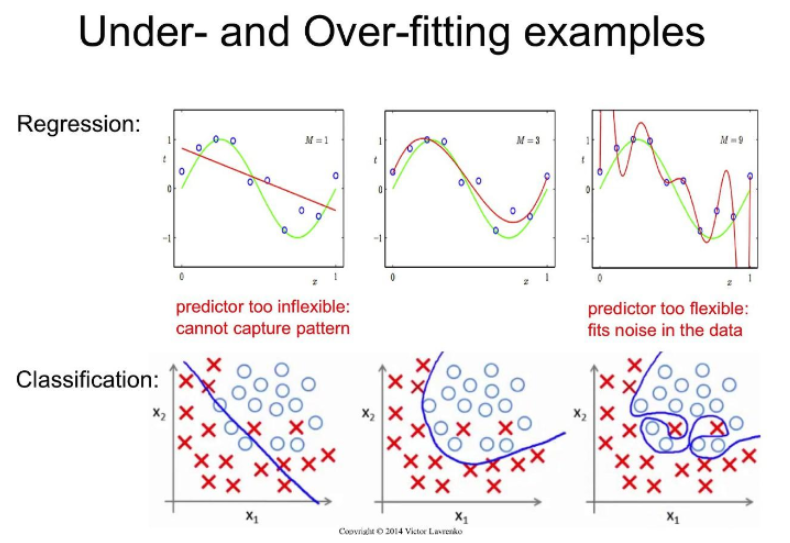

### 6.1.1 Overfitting(과대적합)의 원인
- 1.모델이 너무 복잡한 경우
    - Overfitting을 줄이기 위한 규제 하이퍼파라미터 설정한다.
    - Feature 개수 줄인다.
    
    
- 2.데이터의 문제
    - 데이터 전처리를 통해 질 좋은 데이터를 만든다.
    - 데이터를 더 수집한다. 
        - 현실적으로 어려운 경우가 많다.(비용과 시간의 문제)

### 6.1.2 연습 cancer

Train accuracy : 1.0
Test  accuracy : 0.9300699300699301


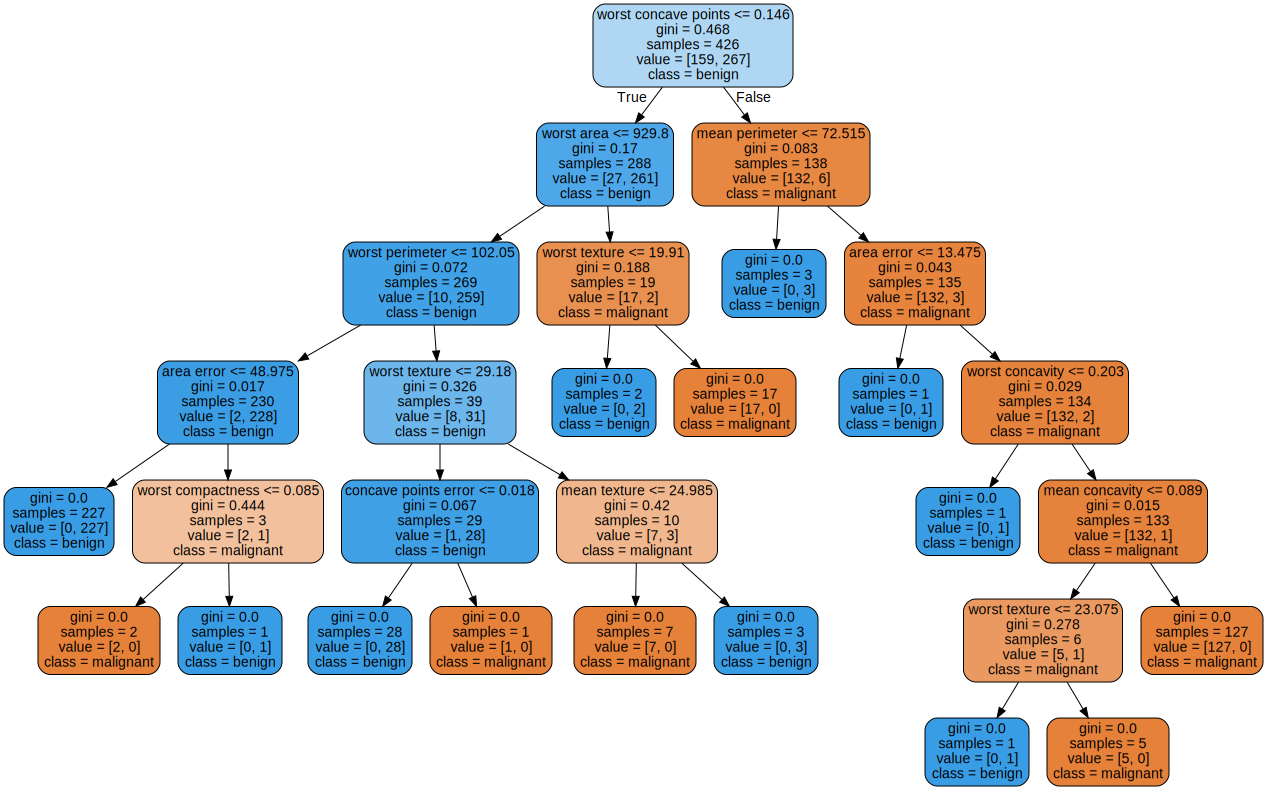

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import export_graphviz
from graphviz import Source

# 1. dataload
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']

# 2. split
X_train,X_test, y_train,y_test = train_test_split(X, y, stratify=y, random_state=1)

# 3. model fit
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# 4. predict 추론 
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

# 5. 정확도 - max depth를 주지 않앗을 경우 
# train > test : 과적합, test 점수가 목표한 것 만큼 나왔니? 
print('Train accuracy :', accuracy_score(y_train, pred_train))
print('Test  accuracy :', accuracy_score(y_test, pred_test))

# y_train이 무엇으로 구성되어있는지 : 0, 1 로 분류
# 0 - 159개, 1- 267개 
np.unique(y_train, return_counts = True) 

# 6. 그래피즈 
graph = Source(export_graphviz(tree, #학습한 모델
                               out_file = None, #이미지로 저장할때 파일경로
                               feature_names = cancer['feature_names'], #Feature(컬럼)의 이름
                               class_names = cancer['target_names'], # Label의 class 이름
                               rounded = True, # 도형 동그랗게 표현 
                               filled = True # 색 칠해줌 : 0(주황), 1(파랑) --> 농도는 갯수
))
graph

In [4]:
X_train

array([[9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [1.205e+01, 1.463e+01, 7.804e+01, ..., 6.548e-02, 2.747e-01,
        8.301e-02],
       [1.288e+01, 1.822e+01, 8.445e+01, ..., 1.096e-01, 2.582e-01,
        8.893e-02],
       ...,
       [1.754e+01, 1.932e+01, 1.151e+02, ..., 1.939e-01, 2.928e-01,
        7.867e-02],
       [1.270e+01, 1.217e+01, 8.088e+01, ..., 8.224e-02, 2.775e-01,
        9.464e-02],
       [1.919e+01, 1.594e+01, 1.263e+02, ..., 1.777e-01, 2.443e-01,
        6.251e-02]])

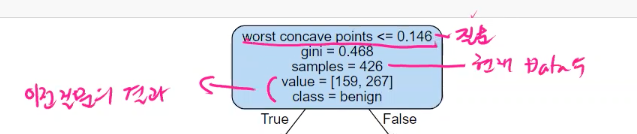

1. 그래프 설명 
    - 맨 윗줄 : 질문 
    - gini : 복잡도 , 클래스 별로 얼마나 섞여 있는지 
        - 0 ~ 0.5 : 0.5로 갈수록 복잡해 진다. 
    - samples : 현재데이터 수 
    - 밑에 2줄 : 이전 질문의 결과 

======== 
1. sample  = 426 --> 총샘플의 수가 426개가 있다. 
    - y_train.size = 426 
    
    
2. value = [159, 267] 
    - np.unique(y_train, return_counts = True) 
    - 0이 159개, 1이 267개 
    - 많은게 1이기 때문에 그 클래스가 benign을 가르킨다. 
    - cancer['target_names] 에서 0은 malignant, 1은 benign 
    
    
3. 질문 : 이 컬럼(??) 의 값이  0.146보다 작거나 같니? 
    - 컬럼의 값을 지정했기 때문에 나옴 , feature_names = cancer['feature_names'] 
    - 지정하지 않았으면 X[27] 이런식으로 인덱스로 나옴 
    
    
4. 질문에 답은 그 다음 gini, samples, valuees, class로 답한다. 



=======

나눴는데 완벽히 나눠지지 않았다. 그래서 또 질문을 한다.  
복잡도가 낮아지도록 나눠진다.     
value = [0,3] <-- 나눠질게 없으니 끝. 
0개가 나오면 나눠질게 없으니 끝. 완벽히 분리.      


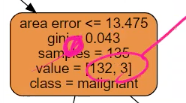

- 여기까지 오면 0일 가능성높다. 
- 그러나 3개의 기준때문에 분할해서 내려가니 1로 예측되었다.
- 잘못예측한 셈이다. ==> 학습을 너무 너무 많이 오버했다. 과적합. 
- 이럴때 어떻게 해줘야할까? 
- 더이상 나누지마 ==> 규제 하이퍼 파라미터를 설정해주자. 
- 학습할때 max_depth를 정해서 제한한다. 


Train정확도: 0.9647887323943662
Test정확도: 0.9370629370629371


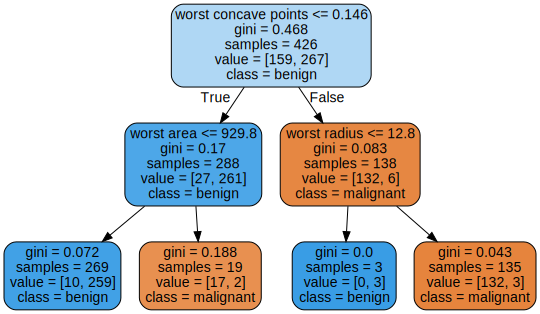

In [19]:
# 정확도 - max_depth = 2
# 3. model fit
tree = DecisionTreeClassifier(max_depth = 2 , random_state=1)
tree.fit(X_train, y_train)

print('Train정확도:', accuracy_score(y_train, pred_train))
print('Test정확도:', accuracy_score(y_test, pred_test)) # 테스트 정확도는 조금 올랐다. 

graph = Source(export_graphviz(tree, #학습한 모델
                               out_file = None, #이미지로 저장할때 파일경로
                               feature_names = cancer['feature_names'], #Feature(컬럼)의 이름
                               class_names = cancer['target_names'], # Label의 class 이름
                               rounded = True, # 도형 동그랗게 표현 
                               filled = True # 색 칠해줌 : 0(주황), 1(파랑) --> 농도는 갯수
))
graph # 완벽히 나눠지진 않았지만 예측을 끝냈다. 

# =======49일차 수업 끝 =======
# =======50일차 수업 시작 =======